In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from experiment import *
import logging
import pandas
from pandas import DataFrame as df
from scipy.interpolate import make_interp_spline, BSpline

In [3]:
!pwd

/home/156/jm0124/kae-cyclones/src


In [60]:
def smooth(x,y, N=50):
    cumsum = np.cumsum(np.insert(y, 0, 0)) 
    return x[N-1:], (cumsum[N:] - cumsum[:-N]) / float(N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

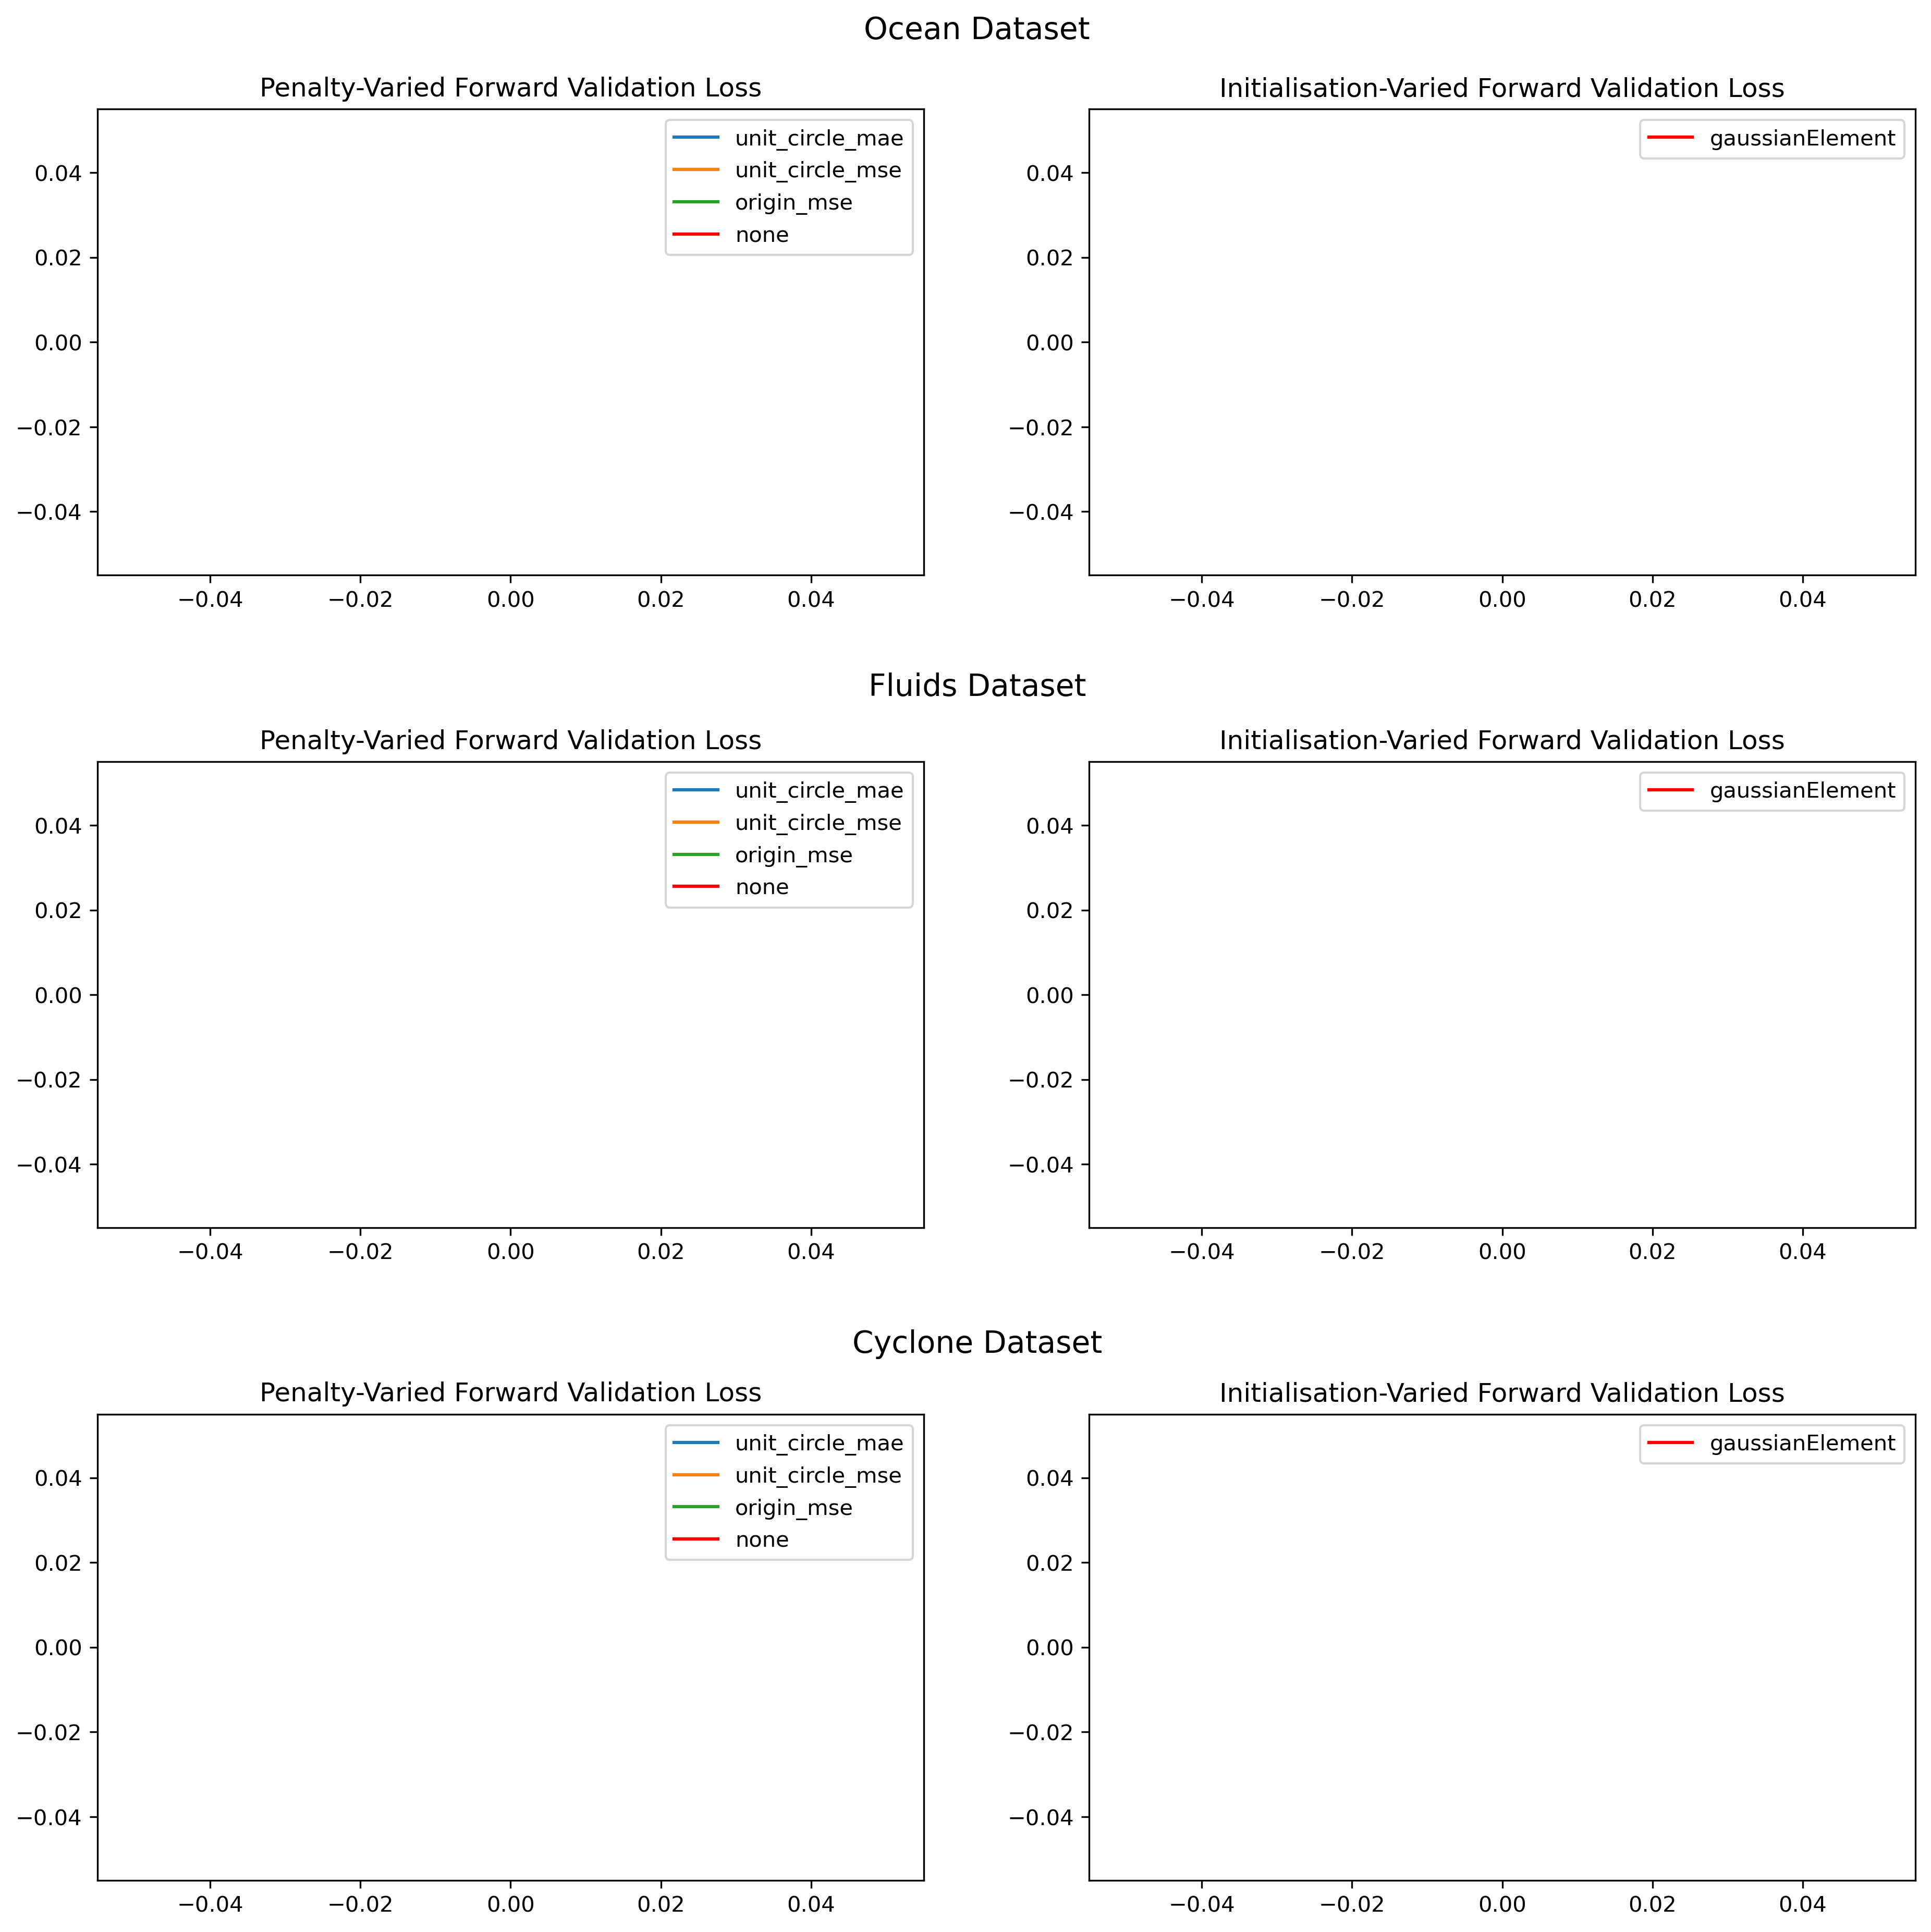

In [50]:
logger = logging.getLogger('my_module_name')
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_overnight_testing.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/fluid_overnight_testing.json", 'r') as f:
    otherResults.append(('Fluids', json.load(f)))
    
with open("/home/156/jm0124/kae-cyclones/results/run_data/cyclone_overnight_testing.json", 'r') as f:
    otherResults.append(('Cyclone', json.load(f)))
    
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")

        if penaltyName == 'none':
            for init_name, init in penalty.items():
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][0].set_title('Penalty-Varied Forward Validation Loss')
        axs[i][1].set_title('Initialisation-Varied Forward Validation Loss')

# for row in axs:
#     for ax in row:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

plt.figtext(0.5,0.92, "Ocean Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_otherds.png')
plt.show()

Diss0
Diss0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Diss0
Diss0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23

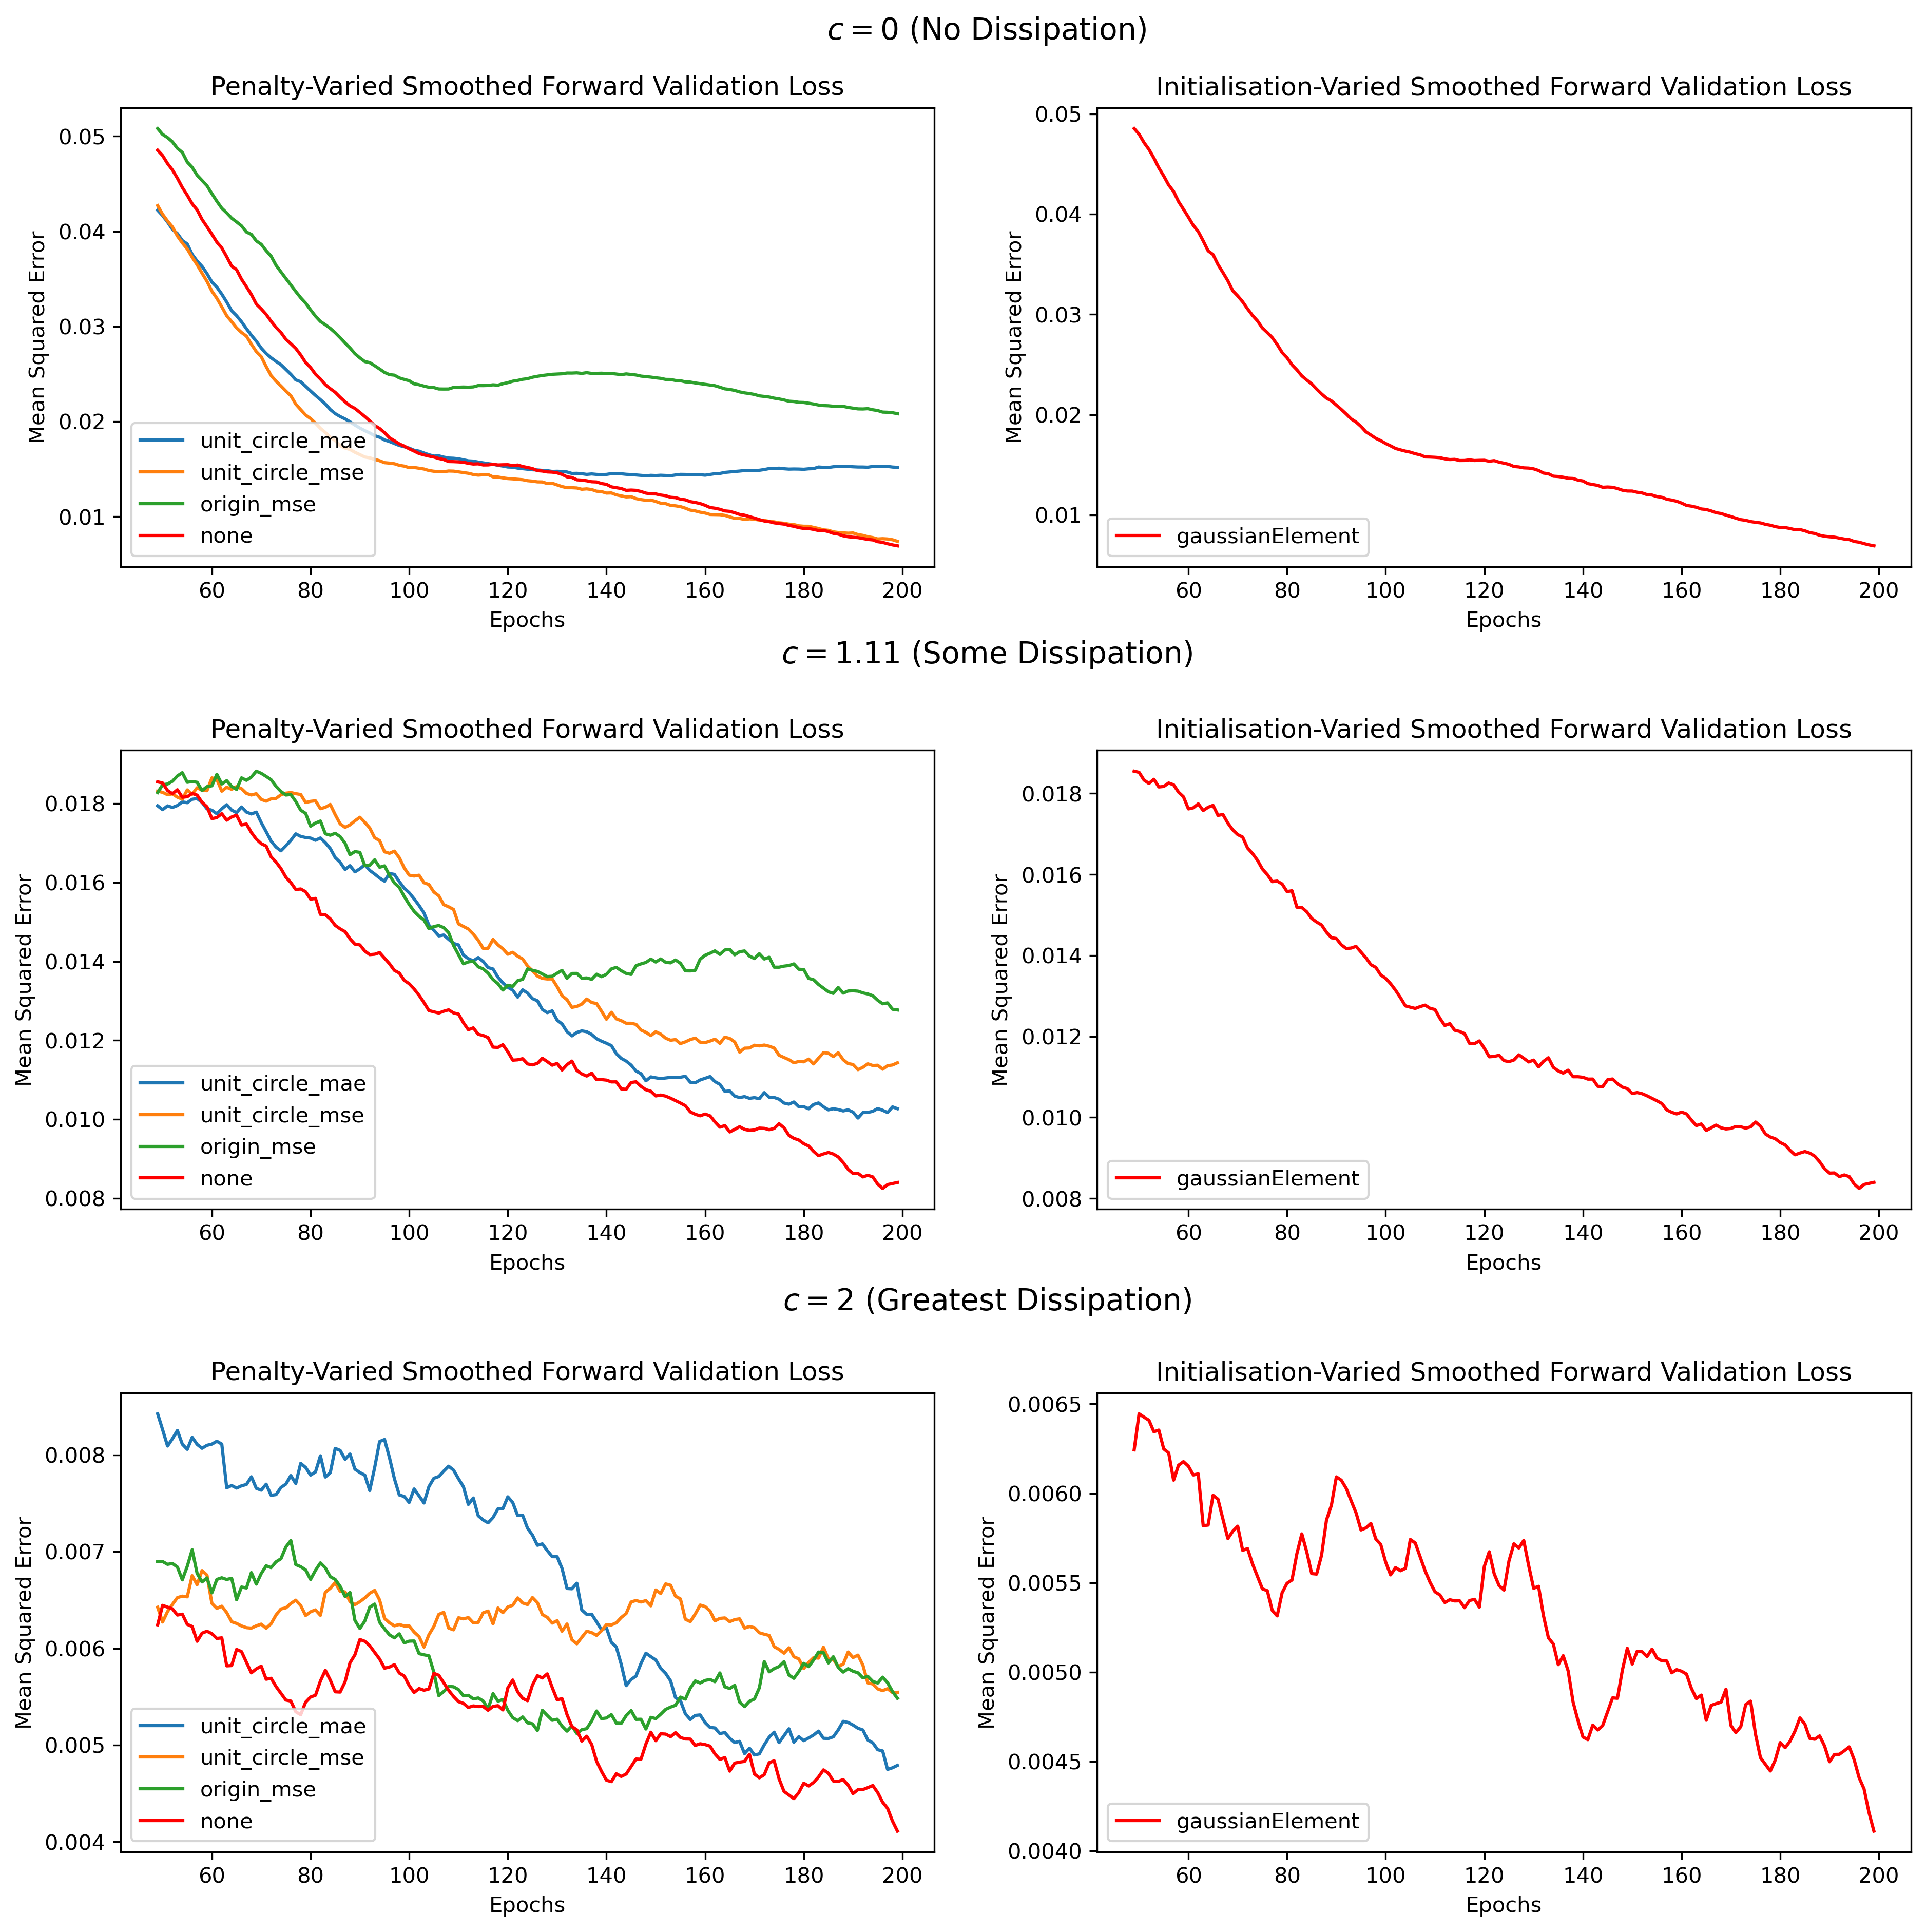

In [61]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_noise_run_100.json", 'r') as f:
     otherResults.append(('Diss0', json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum5_overnight_noise_run.json", 'r') as f:
    otherResults.append(('Diss5', json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum9_overnight_noise_run_16.json", 'r') as f:
    otherResults.append(('Diss9', json.load(f)))
    
for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        print(name)
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        print(name, epochs)
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")
        
        if penaltyName == 'none':
            for init_name, init in penalty.items():
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        # ax.set_yscale('log')
        # ax.set_xscale('log')
        ax.legend(loc=3)

    l[0].set_title('Penalty-Varied Smoothed Forward Validation Loss')
    l[1].set_title('Initialisation-Varied Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.65, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.37, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_pend.png')

In [20]:
import numpy as np
i = -1
j = -1
list1 = [[],[],[]]
list2 = [[],[],[]]
for index, row in df11.iterrows():
    if index % 150 == 0:
        j += 1
        i = -1
    
    if index % 50 == 0:
        i += 1
    
    if j == 2:
        list1[i].append(row[3:].values)
    
    if j == 3:
        list2[i].append(row[3:].values)
    
def get_avg_array(lst):        
    avg_array = np.zeros((16,49))

    for i in range(0,len(lst[0])-1):
        for k in range(0,16):

            avg_array[k][i] = abs(complex(lst[0][i][k]))
    
    return avg_array
        # avg.append(((np.array(l[0][i])) + np.array(l[1][i]) + np.array(l[2][i]))/3)

NameError: name 'df11' is not defined

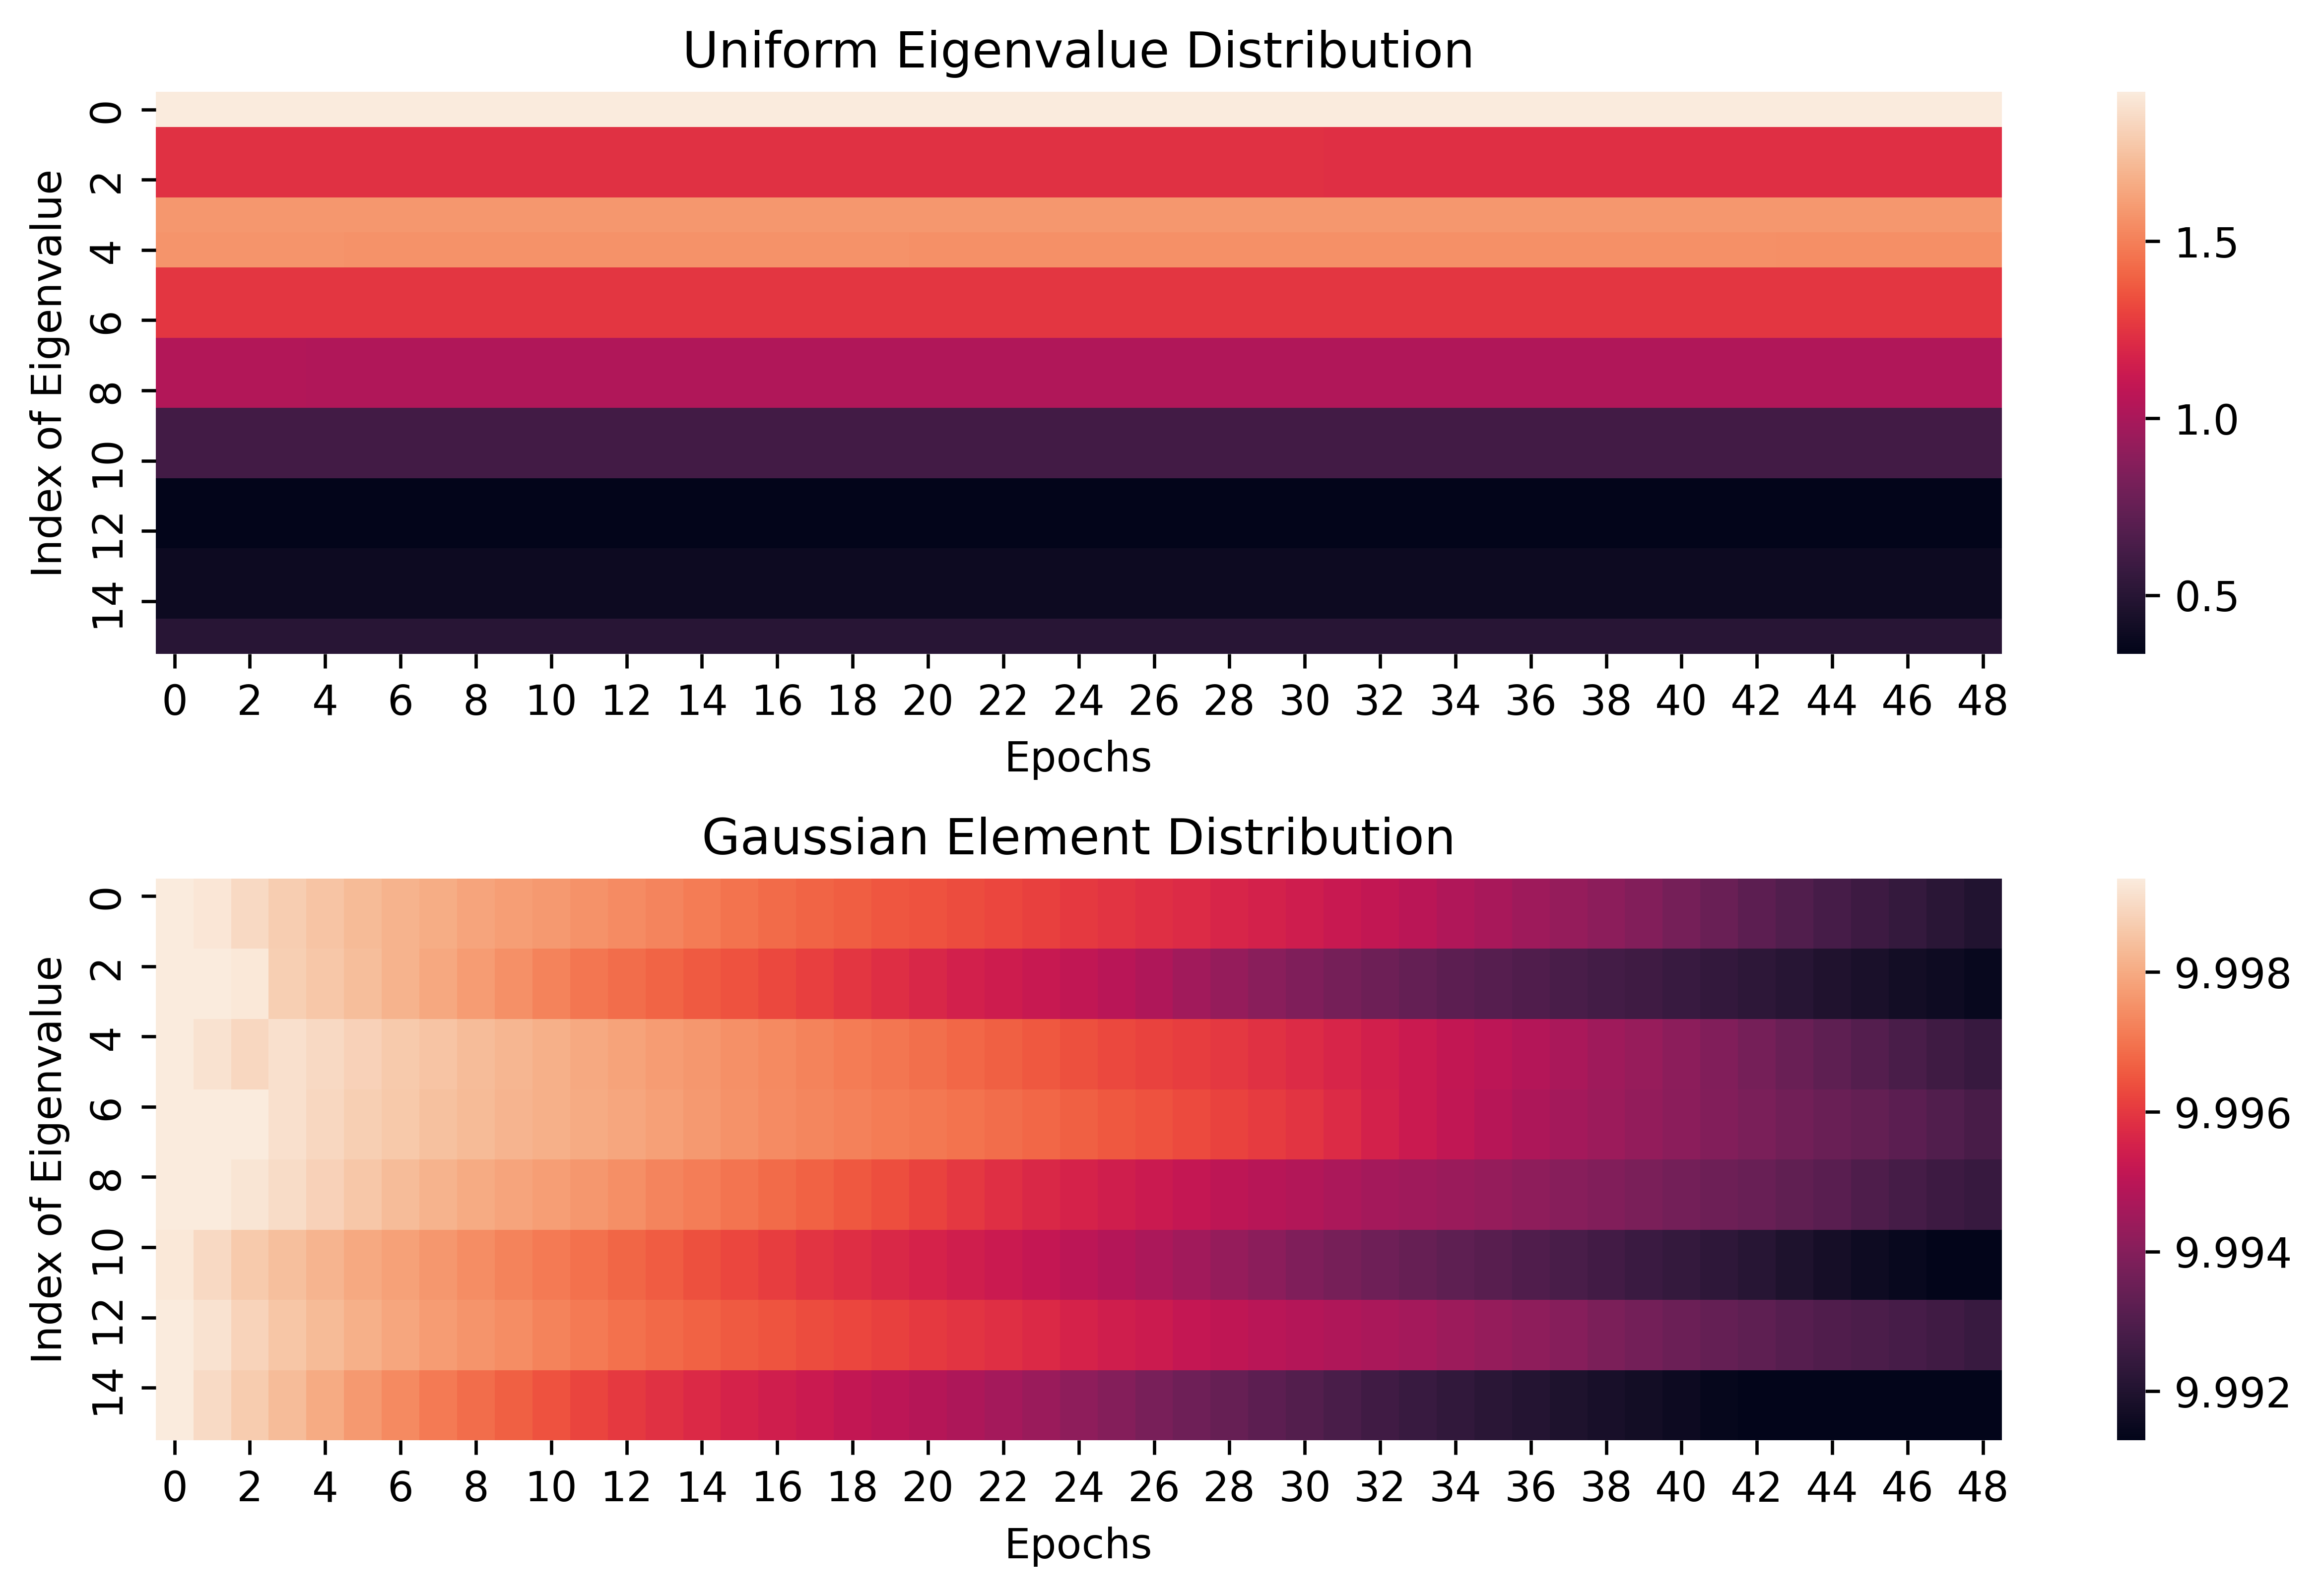

In [305]:
import seaborn
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig, axs = plt.subplots(2,1, figsize=(10,6), dpi=600)
seaborn.heatmap(get_avg_array(list1), ax=axs[0], robust=True)
seaborn.heatmap(get_avg_array(list2), ax=axs[1], robust=True)
axs[0].set_title('Uniform Eigenvalue Distribution')
axs[1].set_title('Gaussian Element Distribution')

for ax in axs:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Index of Eigenvalue')

plt.subplots_adjust(hspace = 0.4 )
plt.savefig('Eigenvalue Plot.png')

<AxesSubplot:>

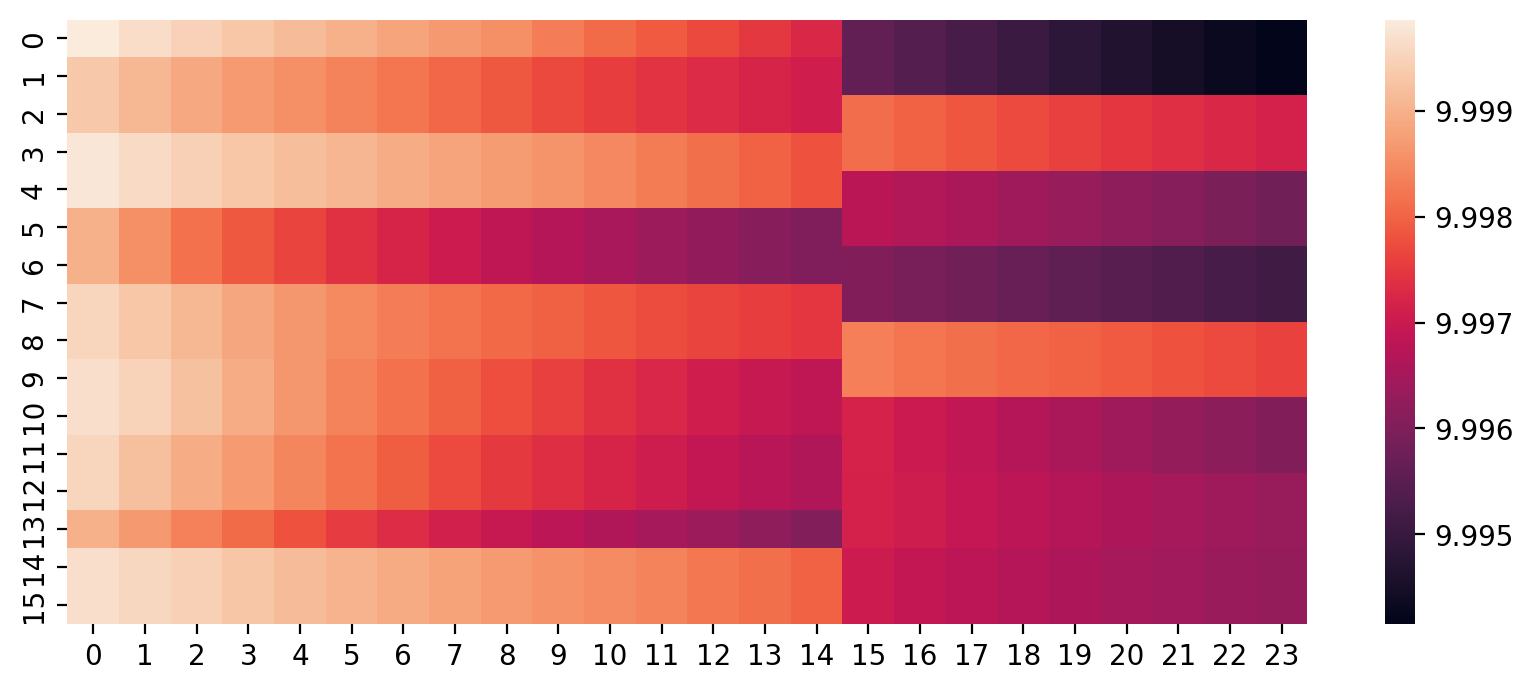

In [139]:
fig = plt.figure(figsize=(10,4), dpi=200)
seaborn.heatmap(get_avg_array(list2))